In [18]:
# https://www.amazon.com/Introduction-Machine-Learning-Python-Scientists-ebook/dp/B01M0LNE8C
import mglearn, sys, os, sklearn, math

from IPython.display import display
from scipy import sparse

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, axes3d

import seaborn as sns
import pandas as pd
import numpy as np
import graphviz

from sklearn.datasets import (load_breast_cancer,
                              load_boston,
                              make_blobs,
                              make_moons,
                              make_circles,
                              load_iris,
                              fetch_lfw_people,
                              load_digits, load_files)
from mglearn.datasets import make_wave, make_forge, load_extended_boston

from sklearn.model_selection import (train_test_split,
                                     cross_val_score,
                                     KFold, LeaveOneOut,
                                     ShuffleSplit,
                                     GroupKFold,
                                     GridSearchCV)
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.svm import LinearSVC, SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import (RandomForestClassifier,
                              RandomForestRegressor,
                              GradientBoostingClassifier,
                              GradientBoostingRegressor)
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import (MinMaxScaler, StandardScaler,
                                   OneHotEncoder, PolynomialFeatures)
from sklearn.decomposition import PCA, NMF, LatentDirichletAllocation
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.feature_selection import SelectFromModel, RFE, SelectPercentile, f_regression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import (confusion_matrix,
                             f1_score, classification_report,
                             precision_recall_curve, average_precision_score,
                             roc_curve, roc_auc_score, accuracy_score)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction.text import (CountVectorizer, ENGLISH_STOP_WORDS,
                                             TfidfVectorizer, TfidfTransformer)

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

%matplotlib inline

In [4]:
!tree -dL 2 aclImdb/

aclImdb/
├── test
│   ├── neg
│   └── pos
└── train
    ├── neg
    ├── pos
    └── unsup

7 directories


In [5]:
!rm -r aclImdb/train/unsup

In [6]:
!tree -dL 2 aclImdb/

aclImdb/
├── test
│   ├── neg
│   └── pos
└── train
    ├── neg
    └── pos

6 directories


In [2]:
reviews_train = load_files('aclImdb/train/')
text_train, ytrain = reviews_train.data, reviews_train.target
print(type(text_train))
print(len(text_train))
print(text_train[1])

<class 'list'>
25000
b'Words can\'t describe how bad this movie is. I can\'t explain it by writing only. You have too see it for yourself to get at grip of how horrible a movie really can be. Not that I recommend you to do that. There are so many clich\xc3\xa9s, mistakes (and all other negative things you can imagine) here that will just make you cry. To start with the technical first, there are a LOT of mistakes regarding the airplane. I won\'t list them here, but just mention the coloring of the plane. They didn\'t even manage to show an airliner in the colors of a fictional airline, but instead used a 747 painted in the original Boeing livery. Very bad. The plot is stupid and has been done many times before, only much, much better. There are so many ridiculous moments here that i lost count of it really early. Also, I was on the bad guys\' side all the time in the movie, because the good guys were so stupid. "Executive Decision" should without a doubt be you\'re choice over this one

In [3]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

In [10]:
print(np.bincount(ytrain))

[12500 12500]


In [4]:
reviews_test = load_files('aclImdb/test/')
text_test, ytest = reviews_test.data, reviews_test.target
print(type(text_test))
print(len(text_test))
print(text_test[1])
print(np.bincount(ytest))

<class 'list'>
25000
b'I don\'t know how this movie has received so many positive comments. One can call it "artistic" and "beautifully filmed", but those things don\'t make up for the empty plot that was filled with sexual innuendos. I wish I had not wasted my time to watch this movie. Rather than being biographical, it was a poor excuse for promoting strange and lewd behavior. It was just another Hollywood attempt to convince us that that kind of life is normal and OK. From the very beginning I asked my self what was the point of this movie,and I continued watching, hoping that it would change and was quite disappointed that it continued in the same vein. I am so glad I did not spend the money to see this in a theater!'
[12500 12500]


In [5]:
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

In [27]:
vect = CountVectorizer().fit(text_train)
xtrain = vect.transform(text_train)
print(repr(xtrain))

<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>


In [28]:
feat_names = vect.get_feature_names()
print(len(feat_names))
print(feat_names[:20])
print(feat_names[20345:20365])
print(feat_names[::3000])

74849
['00', '000', '0000000000001', '00001', '00015', '000s', '001', '003830', '006', '007', '0079', '0080', '0083', '0093638', '00am', '00pm', '00s', '01', '01pm', '02']
['duets', 'duetting', 'duff', 'duffel', 'duffell', 'duffer', 'duffle', 'duffy', 'duforq', 'dufus', 'dufy', 'dug', 'dugal', 'dugan', 'dugdale', 'duggan', 'dugout', 'duguay', 'duh', 'duhhh']
['00', 'ameliorated', 'barking', 'breslin', 'chicanery', 'cost', 'detox', 'eeriest', 'favorit', 'gazongas', 'hasan', 'imtiaz', 'kantrowitz', 'listlessness', 'megalunged', 'nathaniel', 'padilla', 'possessed', 'receptionist', 'sabres', 'shunning', 'steakley', 'temptations', 'umney', 'walkman']


In [17]:
scores = cross_val_score(LogisticRegression(max_iter=10000), xtrain, ytrain, cv=5)
print(np.mean(scores))

0.88124


In [19]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(max_iter=10000), param_grid=param_grid, cv=5)
grid.fit(xtrain, ytrain)
print(grid.best_score_)
print(grid.best_params_)

0.8881599999999998
{'C': 0.1}


In [20]:
xtest = vect.transform(text_test)
print(grid.score(xtest, ytest))

0.87892


In [24]:
vect = CountVectorizer(min_df=4).fit(text_train) # token has to appear in at least 4 docs
xtrain = vect.transform(text_train)
print(repr(xtrain))

<25000x30768 sparse matrix of type '<class 'numpy.int64'>'
	with 3368002 stored elements in Compressed Sparse Row format>


In [25]:
feat_names = vect.get_feature_names()
print(len(feat_names))
print(feat_names[:20])
print(feat_names[20345:20365])
print(feat_names[::3000])

30768
['00', '000', '007', '00am', '00pm', '00s', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '100', '1000', '100th', '101']
['photographer', 'photographers', 'photographic', 'photographing', 'photographs', 'photography', 'photos', 'phrase', 'phrases', 'phrasing', 'phyllida', 'phyllis', 'physical', 'physicality', 'physically', 'physician', 'physicist', 'physicists', 'physics', 'physiological']
['00', 'blame', 'continuum', 'eludes', 'greener', 'judson', 'morrow', 'preceded', 'scowling', 'symphonic', 'wendy']


In [26]:
grid = GridSearchCV(LogisticRegression(max_iter=10000), param_grid=param_grid, cv=5)
grid.fit(xtrain, ytrain)
print(grid.best_score_)
print(grid.best_params_)

0.8881600000000001
{'C': 0.1}


In [28]:
vect = CountVectorizer(min_df=4, stop_words='english').fit(text_train) # removing "stopwords"
xtrain = vect.transform(text_train)
print(repr(xtrain))

<25000x30462 sparse matrix of type '<class 'numpy.int64'>'
	with 2163942 stored elements in Compressed Sparse Row format>


In [29]:
grid = GridSearchCV(LogisticRegression(max_iter=10000), param_grid=param_grid, cv=5)
grid.fit(xtrain, ytrain)
print(grid.best_score_)
print(grid.best_params_)

0.88332
{'C': 0.1}


In [6]:
pipe = make_pipeline(TfidfVectorizer(min_df=4, norm=None),
                     LogisticRegression(max_iter=10000))
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(text_train, ytrain)
print(grid.best_score_)
print(grid.best_params_)

0.89436
{'logisticregression__C': 0.001}


In [7]:
vectoriser = grid.best_estimator_.named_steps['tfidfvectorizer']
xtrain = vectoriser.transform(text_train)

In [9]:
max_value = xtrain.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
feat_names = np.array(vectoriser.get_feature_names())
print(feat_names[sorted_by_tfidf[:20]])

['poignant' 'disagree' 'instantly' 'importantly' 'lacked' 'occurred'
 'currently' 'altogether' 'nearby' 'undoubtedly' 'directs' 'avoided'
 'stinker' 'fond' 'emphasis' 'commented' 'realizing' 'disappoint'
 'downhill' 'inane']


In [10]:
print(feat_names[sorted_by_tfidf[:-20]])

['poignant' 'disagree' 'instantly' ... 'kornbluth' 'roy' 'coop']


In [12]:
sorted_by_idf = np.argsort(vectoriser.idf_)
print(feat_names[sorted_by_idf[:40]])

['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'have' 'one' 'be' 'film' 'are' 'you' 'all'
 'at' 'an' 'by' 'so' 'from' 'like' 'who' 'they' 'there' 'if' 'his' 'out'
 'just' 'about' 'he' 'or']


In [13]:
# n-grams

In [15]:
pipe = make_pipeline(TfidfVectorizer(min_df=4),
                     LogisticRegression(max_iter=10000))
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
              'tfidfvectorizer__ngram_range': [(1,1), (1,2), (1,3)]}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(text_train, ytrain)
print(grid.best_score_)
print(grid.best_params_)

0.90808
{'logisticregression__C': 100, 'tfidfvectorizer__ngram_range': (1, 3)}


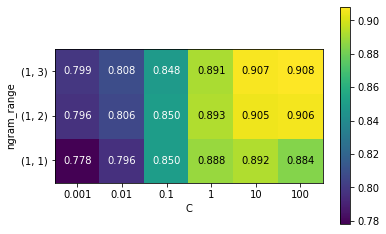

In [16]:
scores = grid.cv_results_['mean_test_score'].reshape(-1, 3).T
heatmap = mglearn.tools.heatmap(scores, xlabel='C', ylabel='ngram_range', cmap='viridis',
                                fmt='%.3f', xticklabels=param_grid['logisticregression__C'],
                                yticklabels=param_grid['tfidfvectorizer__ngram_range'])
plt.colorbar(heatmap)

In [17]:
# LDA
# n_topics is now n_components

In [29]:
vect = CountVectorizer(max_df=0.15, max_features=10000)
x = vect.fit_transform(text_train)
lda = LatentDirichletAllocation(n_components=10, learning_method='batch',
                                max_iter=25, random_state=0)
doc_topics = lda.fit_transform(x)
print(lda.components_.shape)

(10, 10000)


In [30]:
print(doc_topics.shape)

(25000, 10)


In [31]:
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
feat_names = np.array(vect.get_feature_names())
mglearn.tools.print_topics(topics=range(10), feature_names=feat_names,
                           sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
between       war           funny         show          didn          
young         world         worst         series        saw           
family        us            comedy        episode       am            
real          our           thing         tv            thought       
performance   american      guy           episodes      years         
beautiful     documentary   re            shows         book          
work          history       stupid        season        watched       
each          new           actually      new           now           
both          own           nothing       television    dvd           
director      point         want          years         got           


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
horr

In [32]:
lda100 = LatentDirichletAllocation(n_components=100, learning_method='batch',
                                max_iter=25, random_state=0)
doc_topics100 = lda100.fit_transform(x)
print(lda.components_.shape)

(10, 10000)


In [34]:
topics = np.array([7, 19, 22, 31, 44, 45, 54, 70, 85, 99])
sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feat_names = np.array(vect.get_feature_names())
mglearn.tools.print_topics(topics=range(10), feature_names=feat_names,
                           sorting=sorting, topics_per_chunk=7, n_words=15)

topic 0       topic 1       topic 2       topic 3       topic 4       topic 5       topic 6       
--------      --------      --------      --------      --------      --------      --------      
doesn         star          effects       lee           allen         minutes       rating        
real          wars          special       stories       point         enough        10            
main          world         monster       segment       woody         lack          ben           
interesting   our           budget        new           audience      script        rated         
work          luke          creature      directors     director      least         13            
rather        us            cgi           short         new           half          mark          
feel          new           look          spike         rather        poor          pg            
actors        again         low           segments      less          re            flight        
seem      

In [35]:
suspense = np.argsort(doc_topics100[:, 70])[::-1]
for i in suspense[:10]:
    print(b'.'.join(text_train[i].split(b'.')[:2]) + b'.\n')

b'"Red Rock West" was far and away one of the best suspense thrillers of the 90\'s with a superb script (by John and Rick Dahl) that kept you guessing throughout and on the edge of your seat for most of the film. It was brilliantly directed by John Dahl and featured a marvellous cast including Nicolas Cage, Dennis Hopper, Lara Flynn Boyle and especially J.\n'
b"Dahl seems to have been under the influence of Wenders' The American Friend. Innocent Nick Cage gets recruited for a hit.\n"
b'This movie started me on a Nick Cage kick. It is a story full of twists and turns- a movie of motives and moves.\n'
b'In any number of films, you can find Nicholas Cage as a strong, silent hero, Dennis Hopper as a homicidal maniac, Lara Flynn Boyle as a vamp/tramp, and the late, lamented J.T.\n'
b'Girlfight is a story about a troubled teen named Diana Guzman (Michelle Rodriguez). Diana is burdened by her mothers suicide and a sexist father living in a sexist community.\n'
b'Much to your presumable happin

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(10,10))
topic_names = ['{:>2} '.format(i) + ' '.join(words) 
               for i, words in enumerate(feat_names[sorting[:, :2]])]

for col in [0,1]:
    start = col*50
    end = (col+1)*50
    ax[col].barh(np.arange(50), np.sum(doc_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha='left', va='top')
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()